In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
data.rename(columns = {'Whole weight':'w_weight','Shucked weight':'shuck_weight','Viscera weight':'v_weight','Shell weight':'shell_weight' }, inplace = True)
data

,Sex,Length,Diameter,Height,w_weight,shuck_weight,v_weight,shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
data['age'] = data['Rings']+1.5
data.drop('Rings', axis = 1, inplace = True)
data

,Sex,Length,Diameter,Height,w_weight,shuck_weight,v_weight,shell_weight,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5


In [5]:
data.shape

(4177, 9)

In [6]:
data.isna().sum()

Sex             0
Length          0
Diameter        0
Height          0
w_weight        0
shuck_weight    0
v_weight        0
shell_weight    0
age             0
dtype: int64

In [7]:
label_enc=LabelEncoder()

In [8]:
df1=label_enc.fit_transform(data['Sex'])
df1

array([2, 2, 0, ..., 2, 0, 2])

In [9]:
data['Sex']=df1
data

,Sex,Length,Diameter,Height,w_weight,shuck_weight,v_weight,shell_weight,age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5


In [10]:
data.describe()

,Sex,Length,Diameter,Height,w_weight,shuck_weight,v_weight,shell_weight,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


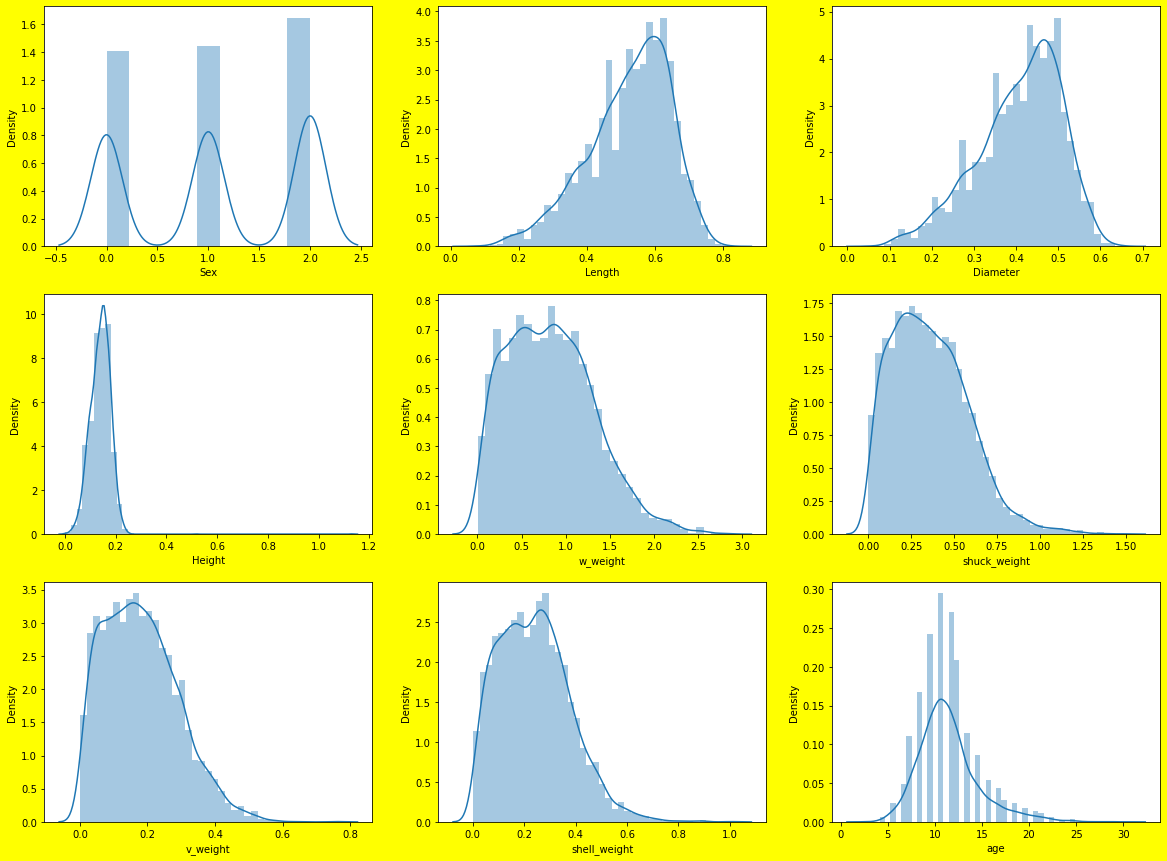

In [11]:
plt.figure(figsize=(20,15),facecolor="yellow")
plotnumber=1
for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [12]:
data['age'].mean()

11.433684462532918

In [13]:
Age = []
for i in data['age']:
    if i > 11.43:
        Age.append('1')
    else:
        Age.append('0')
data['age']=Age
data

,Sex,Length,Diameter,Height,w_weight,shuck_weight,v_weight,shell_weight,age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,1
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,0
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,1
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,1
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,1
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1


In [14]:
#Now, let's split our data into features and label
x=data.drop(columns="age", axis=1)
y=data["age"]

In [15]:
y

0       1
1       0
2       0
3       1
4       0
       ..
4172    1
4173    1
4174    0
4175    1
4176    1
Name: age, Length: 4177, dtype: object

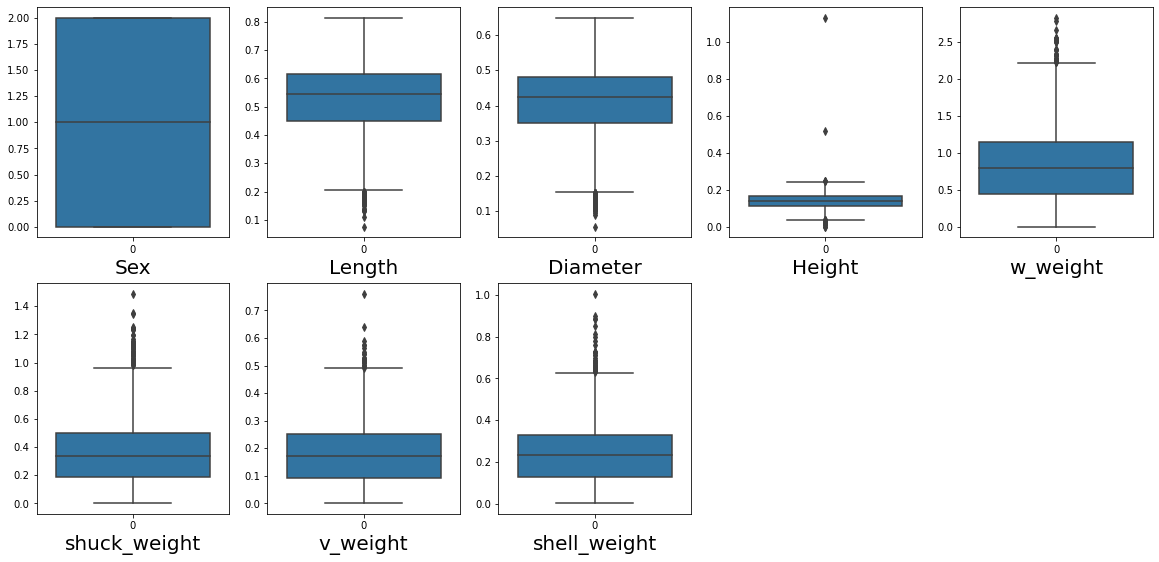

In [16]:
plt.figure(figsize=(20,50))
graph=1
for column in x:
    if plotnumber<=50:
        ax=plt.subplot(10,5,graph)
        sns.boxplot(data=data[column])
        plt.xlabel(column,fontsize=20)
    graph+=1
plt.show()

In [17]:
#1st Quantile
q1=data.quantile(0.25)

#3rd Quantile
q3=data.quantile(0.75)

iqr=q3-q1

In [18]:
length_low=(q1.Length-(1.5*iqr.Length))
index=np.where(data['Length']<length_low)
data=data.drop(data.index[index])
data.reset_index()

,index,Sex,Length,Diameter,Height,w_weight,shuck_weight,v_weight,shell_weight,age
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,1
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,0
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,1
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0
...,...,...,...,...,...,...,...,...,...,...
4123,4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,1
4124,4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,1
4125,4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0
4126,4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1


In [19]:
Dia_low=(q1.Diameter-(1.5*iqr.Diameter))
index=np.where(data['Diameter']<Dia_low)
data=data.drop(data.index[index])
data.reset_index()

,index,Sex,Length,Diameter,Height,w_weight,shuck_weight,v_weight,shell_weight,age
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,1
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,0
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,1
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0
...,...,...,...,...,...,...,...,...,...,...
4111,4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,1
4112,4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,1
4113,4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0
4114,4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1


In [20]:
Height_low=(q1.Height-(1.5*iqr.Height))
index=np.where(data['Height']<Height_low)
data=data.drop(data.index[index])
data.reset_index()

,index,Sex,Length,Diameter,Height,w_weight,shuck_weight,v_weight,shell_weight,age
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,1
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,0
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,1
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0
...,...,...,...,...,...,...,...,...,...,...
4108,4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,1
4109,4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,1
4110,4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0
4111,4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1


In [21]:
Height_high=(q3.Height+(1.5*iqr.Height))
index=np.where(data['Height']>Height_high)
data=data.drop(data.index[index])
data.reset_index()

,index,Sex,Length,Diameter,Height,w_weight,shuck_weight,v_weight,shell_weight,age
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,1
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,0
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,1
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0
...,...,...,...,...,...,...,...,...,...,...
4103,4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,1
4104,4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,1
4105,4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0
4106,4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1


In [22]:
whole_weight_high=(q3.w_weight+(1.5*iqr.w_weight))
index=np.where(data['w_weight']>whole_weight_high)
data=data.drop(data.index[index])
data.reset_index()

,index,Sex,Length,Diameter,Height,w_weight,shuck_weight,v_weight,shell_weight,age
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,1
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,0
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,1
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0
...,...,...,...,...,...,...,...,...,...,...
4075,4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,1
4076,4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,1
4077,4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0
4078,4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1


In [23]:
s_weight_high=(q3.shuck_weight+(1.5*iqr.shuck_weight))
index=np.where(data['shuck_weight']>s_weight_high)
data=data.drop(data.index[index])
data.reset_index()

,index,Sex,Length,Diameter,Height,w_weight,shuck_weight,v_weight,shell_weight,age
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,1
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,0
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,1
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0
...,...,...,...,...,...,...,...,...,...,...
4051,4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,1
4052,4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,1
4053,4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0
4054,4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1


In [24]:
v_weight_high=(q3.v_weight+(1.5*iqr.v_weight))
index=np.where(data['v_weight']>v_weight_high)
data=data.drop(data.index[index])
data.reset_index()

,index,Sex,Length,Diameter,Height,w_weight,shuck_weight,v_weight,shell_weight,age
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,1
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,0
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,1
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0
...,...,...,...,...,...,...,...,...,...,...
4043,4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,1
4044,4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,1
4045,4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0
4046,4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1


In [25]:
shell_weight_high=(q3.shell_weight+(1.5*iqr.shell_weight))
index=np.where(data['shell_weight']>shell_weight_high)
data=data.drop(data.index[index])
data.reset_index()

,index,Sex,Length,Diameter,Height,w_weight,shuck_weight,v_weight,shell_weight,age
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,1
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,0
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,1
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0
...,...,...,...,...,...,...,...,...,...,...
4019,4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,1
4020,4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,1
4021,4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0
4022,4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1


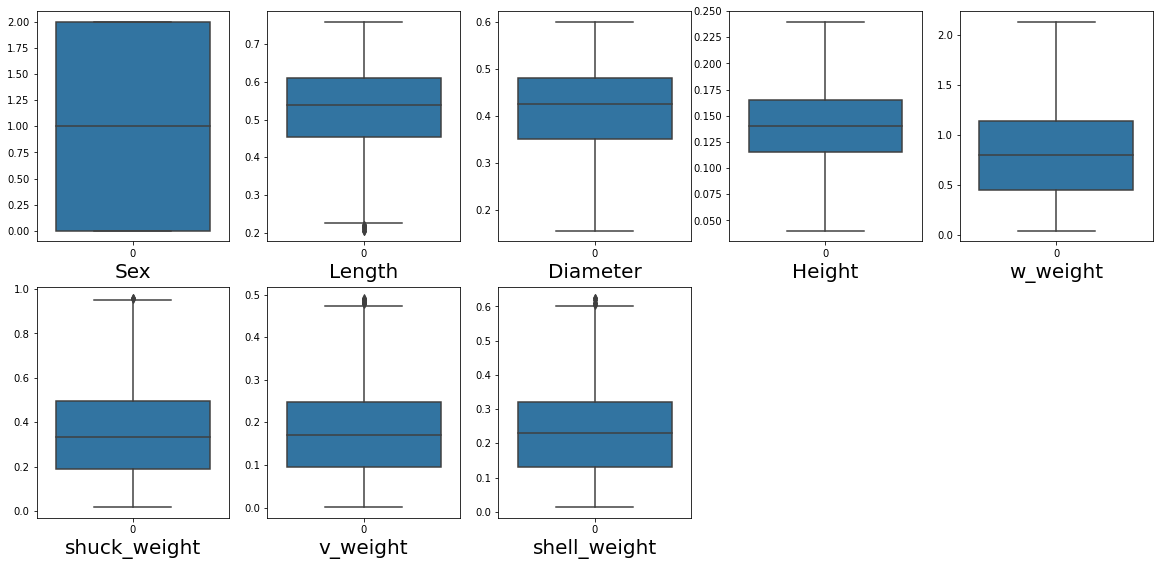

In [26]:
plt.figure(figsize=(20,50))
graph=1
for column in x:
    if plotnumber<=50:
        ax=plt.subplot(10,5,graph)
        sns.boxplot(data=data[column])
        plt.xlabel(column,fontsize=20)
    graph+=1
plt.show()

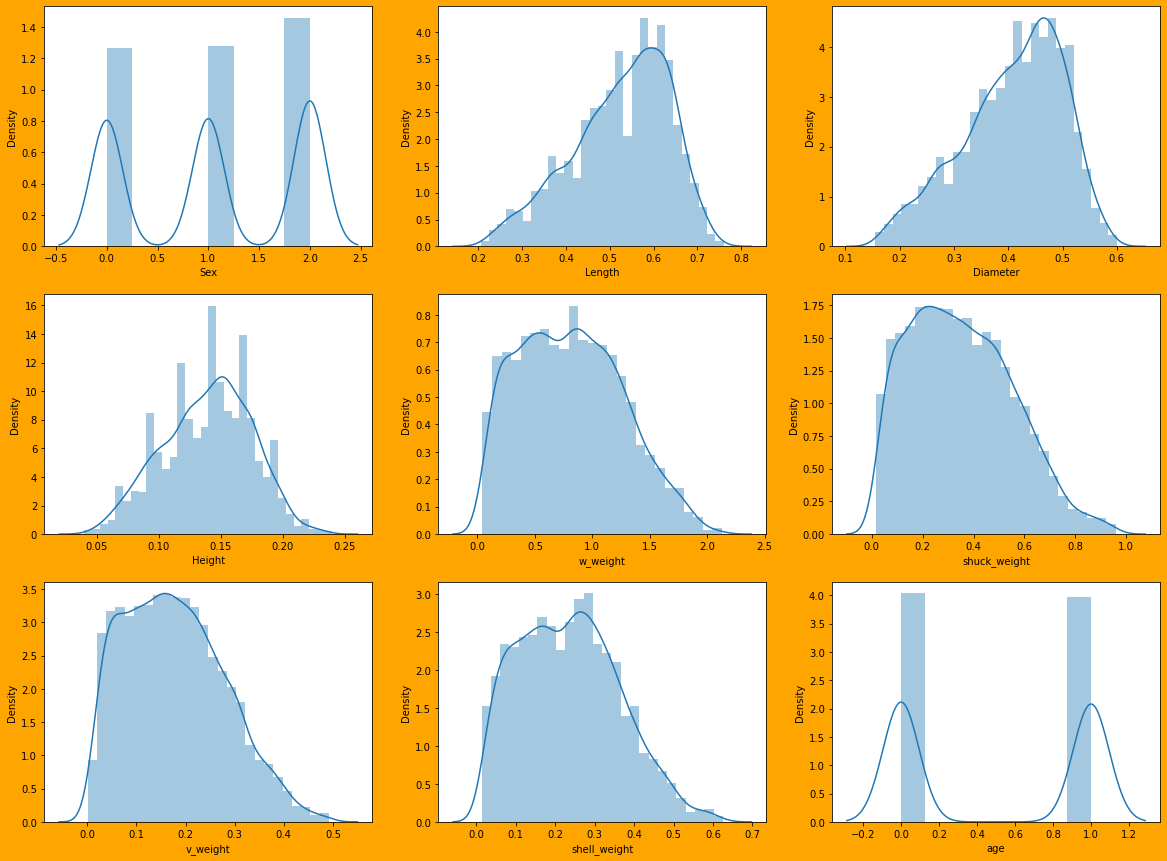

In [27]:
plt.figure(figsize=(20,15),facecolor="orange")
plotnumber=1
for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

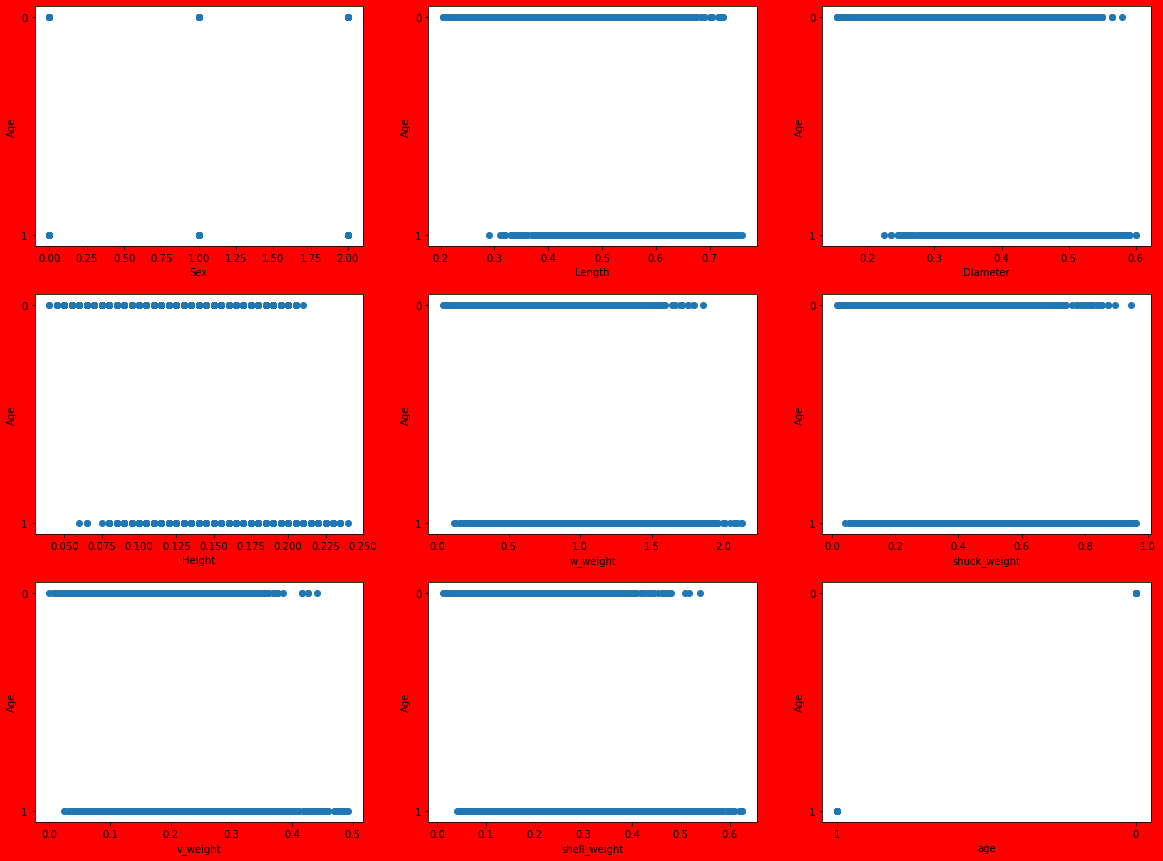

In [28]:
plt.figure(figsize=(20,15), facecolor='red')
plotnumber=1
for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        plt.scatter(data[column],data["age"])
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Age', fontsize=10)
    plotnumber+=1
plt.show()

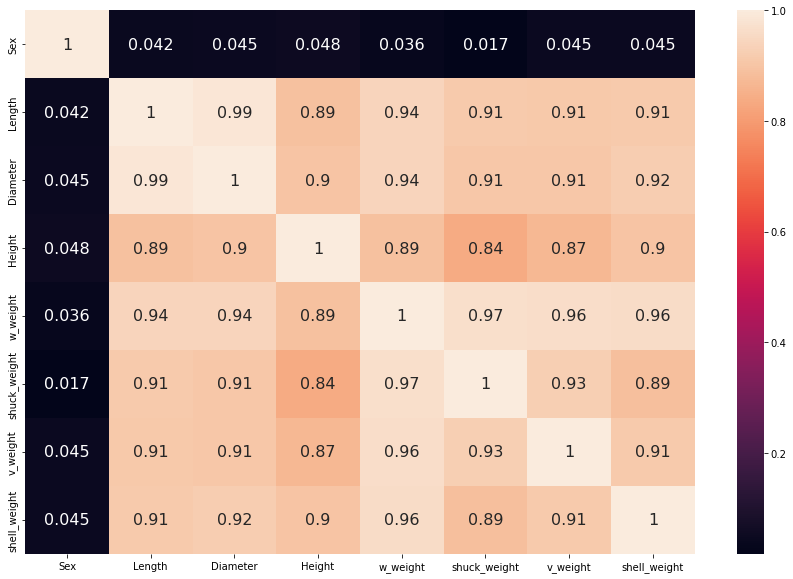

In [29]:
df_corr=data.corr().abs()
plt.figure(figsize=(15,10))
sns.heatmap(df_corr,annot=True, annot_kws={'size':16})
plt.show()

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [31]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((2923, 8), (1254, 8), (2923,), (1254,))

In [32]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [33]:
clf=DecisionTreeClassifier()

In [34]:
y

0       1
1       0
2       0
3       1
4       0
       ..
4172    1
4173    1
4174    0
4175    1
4176    1
Name: age, Length: 4177, dtype: object

In [35]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [36]:
clf.score(x_train,y_train)

1.0

In [37]:
y_pred=clf.predict(x_test)

In [38]:
accuracy_score(y_test,y_pred)

0.7089314194577353

In [39]:
#Let do some Hyperparameter tuning

grid_param={
    'criterion':['gini','entropy'],
    'max_depth':range(10,15),
    'min_samples_leaf':range(2,10),
    'min_samples_split': range(3,10),
    'max_leaf_nodes':range(2,4)
}

In [40]:
grid_search=GridSearchCV(estimator=clf,param_grid=grid_param,cv=5,n_jobs=-1)

In [41]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(2, 4),
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(3, 10)})

In [42]:
best_parameters=grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 2, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [43]:
clf=DecisionTreeClassifier(criterion='gini',max_leaf_nodes=20,min_samples_split=10,max_depth=60,min_samples_leaf=2)

In [44]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=60, max_leaf_nodes=20, min_samples_leaf=2,
                       min_samples_split=10)

In [45]:
y_pred=clf.predict(x_test)

In [46]:
accuracy_score(y_test,y_pred)

0.7607655502392344